In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import tqdm

d = lambda x0, y0, x1, y1: np.sqrt((x0-x1)**2 + (y0-y1)**2)

def get_points_within(eps, X, Y):
    points_in_range = [] 

    for x0, y0 in zip(X, Y):
        points_in_range.append([])
        for x1, y1 in zip(X, Y):
            if d(x0, y0, x1, y1) <= eps:
                points_in_range[-1].append((x1, y1))
    
    return points_in_range

In [2]:
def makeframe(eps, j):
    np.random.seed(123)
    n = 50
    fig, axs = plt.subplots(1, 1, figsize=(20, 20))
    r = 1 + 0.1*np.random.randn(n)
    theta = 2*np.pi*np.random.random(n)

    X = r*np.cos(theta)
    Y = r*np.sin(theta)

    circles = [plt.Circle((x, y), eps, color='b', fill=True, alpha=0.3) for x, y in zip(X, Y)]
    points_in_range = get_points_within(eps, X, Y)

    for i, circle in enumerate(circles):
        axs.add_patch(circle)
        dim_of_simp = len(points_in_range[i]) 
        if dim_of_simp > 1:
            for couple in combinations(points_in_range[i], 2):
                X_ = [couple[0][0], couple[1][0]]
                Y_ = [couple[0][1], couple[1][1]]

                plt.plot(X_, Y_, color="red")
                #plt.plot(x_edge, y_edge)

    points_in_range

    plt.scatter(X, Y, color="black", s=300)
    plt.xlim((-1.5, 1.5))
    plt.ylim((-1.5, 1.5))
    #plt.savefig(f"vrc/anim/frame_{j}.png")
    #plt.close()

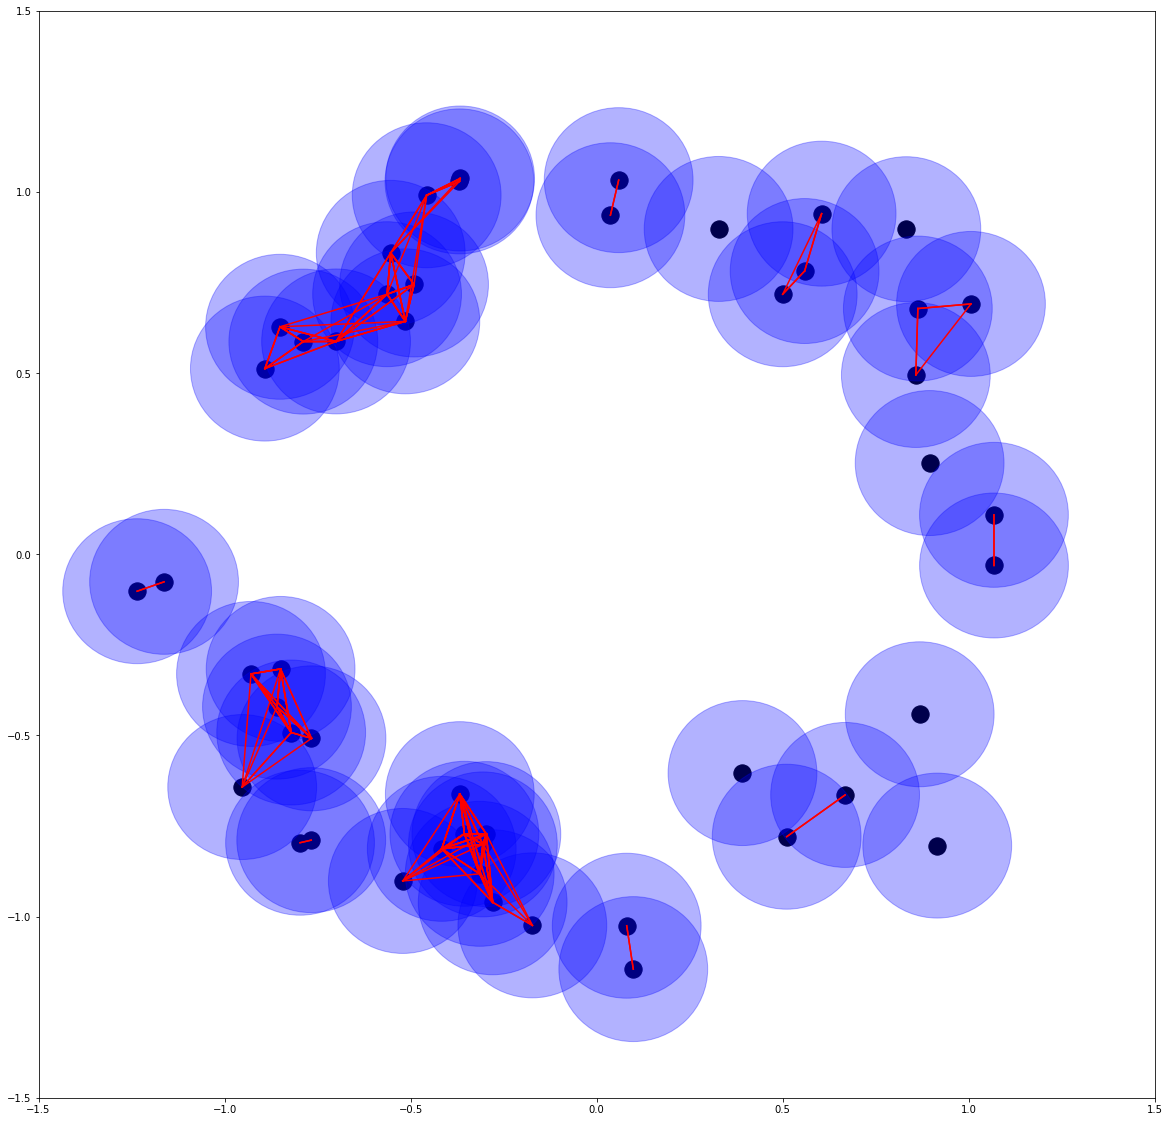

In [3]:
makeframe(0.2, 0)

In [3]:
for i, eps in tqdm.tqdm(enumerate(np.linspace(0, 0.8, 60))):
    makeframe(eps, i)

60it [02:27,  2.46s/it]


In [4]:
import os

key = lambda filename: int(filename[6:][:-4])
sorted_listdir = lambda directory: sorted(os.listdir(directory), key=key)


In [5]:
import imageio
images = []
for filename in tqdm.tqdm(sorted_listdir("vrc/anim/")):
    images.append(imageio.imread("vrc/anim/" + filename))
imageio.mimsave('vrc/anim.gif', images, duration=0.1)

100%|██████████| 60/60 [00:02<00:00, 20.58it/s]


In [ ]:
if dim_of_simp > 2:
                for throuple in combinations(points_in_range[i], 3):
                    Xs = [point[0] for point in throuple]
                    Ys = [point[1] for point in throuple]

                    ymin_i = np.argmin(Ys)
                    ymax_i = np.argmax(Ys)

                    xmin_i = np.argmin(Xs)
                    xmax_i = np.argmax(Xs)

                    if not (ymax_i in [xmin_i, xmax_i]):
                        def y_func(x):
                            if x <= Xs[ymax_i]:
                                return (Ys[ymax_i] - Ys[xmin_i])/(Xs[ymax_i] - Xs[xmin_i])*(x - Xs[xmin_i]) + Ys[xmin_i]
                            elif x > Xs[ymax_i]:
                                return (Ys[ymax_i] - Ys[xmax_i])/(Xs[ymax_i] - Xs[xmax_i])*(x - Xs[xmax_i]) + Ys[xmax_i]

                        x_top = np.linspace(Xs[xmin_i], Xs[xmax_i], num=20)
                        y_top = [y_func(x) for x in x_top]
                        
                        
                        y_bot = (Ys[xmin_i] - Ys[xmax_i])/(Xs[xmin_i] - Xs[xmax_i])*(x_top - Xs[xmax_i]) + Ys[xmax_i]
                        
                        plt.fill_between(x_top, y_top, y_bot, color="red", alpha=dim_of_simp*(1/10))
                    else:
                        x_top = np.linspace(Xs[xmin_i], Xs[xmax_i], num=20)
                        y_top = (Ys[xmax_i] - Ys[xmin_i])/(Xs[xmax_i] - Xs[xmin_i])*(x_top - Xs[xmin_i]) + Ys[xmin_i]
                        
                        def y_func(x):
                            if x <= Xs[ymin_i]:
                                return (Ys[ymin_i] - Ys[xmin_i])/(Xs[ymin_i] - Xs[xmin_i])*(x - Xs[xmin_i]) + Ys[xmin_i]
                            elif x > Xs[ymin_i]:
                                return (Ys[ymin_i] - Ys[xmax_i])/(Xs[ymin_i] - Xs[xmax_i])*(x - Xs[xmax_i]) + Ys[xmax_i]
                            
                        y_bot = [y_func(x) for x in x_top]
                        plt.plot(x_top, y_bot, color="blue")
                        plt.fill_between(x_top, y_top, y_bot, color="red", alpha=dim_of_simp*(1/10))
